# Importar librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline


# 1.- Cargar Arhivos

In [2]:
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

In [3]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Guardar Id del test para la submission
test_ids = test["Id"]

In [6]:
# Eliminar Id de ambos para mejorar la prediccion del modelo
train = train.drop(columns=["Id"])
test  = test.drop(columns=["Id"])

# Separar la variable objetivo en y
y = train["SalePrice"]
X = train.drop(columns=["SalePrice"])

In [7]:
# Combinar train + test para limpiar juntos
combined = pd.concat([X, test], axis=0, ignore_index=True)

# 2.- Limpieza de datos

In [8]:
# Ajustar las opciones para mostrar todas las columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) # También puede ser útil para muchas filas

# Ejecutar tu código nuevamente
combined.isnull().sum().sort_values(ascending=False)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
MasVnrType       1766
FireplaceQu      1420
LotFrontage       486
GarageYrBlt       159
GarageFinish      159
GarageQual        159
GarageCond        159
GarageType        157
BsmtExposure       82
BsmtCond           82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrArea         23
MSZoning            4
BsmtHalfBath        2
Utilities           2
BsmtFullBath        2
Functional          2
TotalBsmtSF         1
BsmtFinSF1          1
SaleType            1
BsmtFinSF2          1
GarageCars          1
Exterior2nd         1
Exterior1st         1
GarageArea          1
KitchenQual         1
BsmtUnfSF           1
Electrical          1
Fireplaces          0
TotRmsAbvGrd        0
MSSubClass          0
BedroomAbvGr        0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal   

In [9]:
# (Opcional) Restaurar la configuración por defecto
#pd.reset_option('display.max_columns')
#pd.reset_option('display.max_rows')

In [10]:
# Crear variable para los valores faltantes NaN

cols_none = [
    "Alley","PoolQC","Fence","MiscFeature","FireplaceQu",
    "GarageType","GarageFinish","GarageQual","GarageCond",
    "BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2",
    "MasVnrType"
]

In [11]:
# Rellenar los valores faltantes con "NaN" con cols_none
for col in cols_none:
    if col in combined.columns:
        combined[col] = combined[col].fillna("NaN")

In [12]:
# Crear variable con solo las columnas numericas
num_cols = combined.select_dtypes(include=[np.number]).columns
# Rellenar numeros faltantes con la media
combined[num_cols] = combined[num_cols].fillna(combined[num_cols].median())

# Rellenamos las columnas object faltantes con "NaN" 
cat_cols = combined.select_dtypes(include=["object"]).columns
combined[cat_cols] = combined[cat_cols].fillna("NaN")

#### Ya tenemos nuestro archivo limpio para empezar a trabajar con el modelo

# 3.- Crear Encodig Categorico


In [13]:
# Convertimos las variables categorias a numericas
encoder = OrdinalEncoder()
combined[cat_cols] = encoder.fit_transform(combined[cat_cols])

# 4.- Separar Train y Test de vuelta

In [14]:
X_clean = combined.iloc[:len(X), :].copy()
test_clean = combined.iloc[len(X):, :].copy()

# 5.- Entrenamiento del modelo

In [15]:
model = RandomForestRegressor(
    n_estimators=500,
    random_state=42,
    max_depth=None,
    min_samples_split=2,
    n_jobs=-1
)

model.fit(X_clean, y)

RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=42)

# 6.- Prediccion del modelo (Test)

In [16]:
# Separar un conjunto de validación (train/test split)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_clean, y, test_size=0.2, random_state=42
)

# Entrenar el modelo usando solo X_train
model.fit(X_train, y_train)

# Predecir sobre el conjunto de validación
y_pred = model.predict(X_valid)

# Calcular RMSE y R²
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
r2 = r2_score(y_valid, y_pred)

print("RMSE:", rmse)
print("R2:", r2)

RMSE: 28669.874746237103
R2: 0.892838753429451


El R2 nos indica que tenemos una eficiencia de prediccion del 89% algo aceptable, y el RMSE nos indica que tan lejano esta el precio de nuestras viviendas, un promedio de +- $28,669.87, cuan equivocado esta el precio al predecir.

Nota: 
- Podemos mejorar el modelo con GridSearchCV y eliminando los outliers (muy importante)
- Podemos agregar Pipeline para evitar fuga de datos.
- Podemos usar modelos avanzados para descubir un mejor desempeño como: XGBoost, LightGBM, CatBoost.

# 7.- Limpiamos de nuevo el DF_train para los nuevos modelos

In [17]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [18]:
# Separar variables
X = train.drop(columns=["SalePrice"])
y = train["SalePrice"]

# Separar valores categoricos y numericos
num_cols = X.select_dtypes(include="number").columns
cat_cols = X.select_dtypes(include="object").columns

# Preprocesamiento y codificacion
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)

# 8.- Analizamos los mejores Outliners

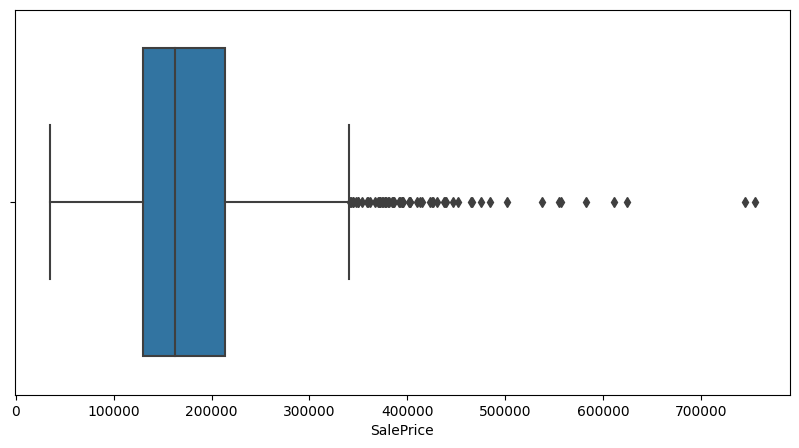

In [19]:
plt.figure(figsize=(10,5))
sns.boxplot(x=train["SalePrice"])
plt.show()

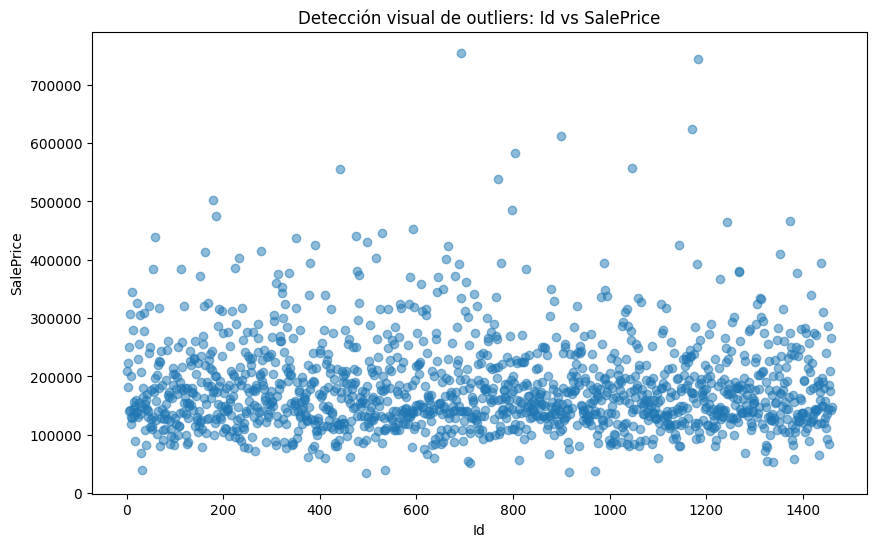

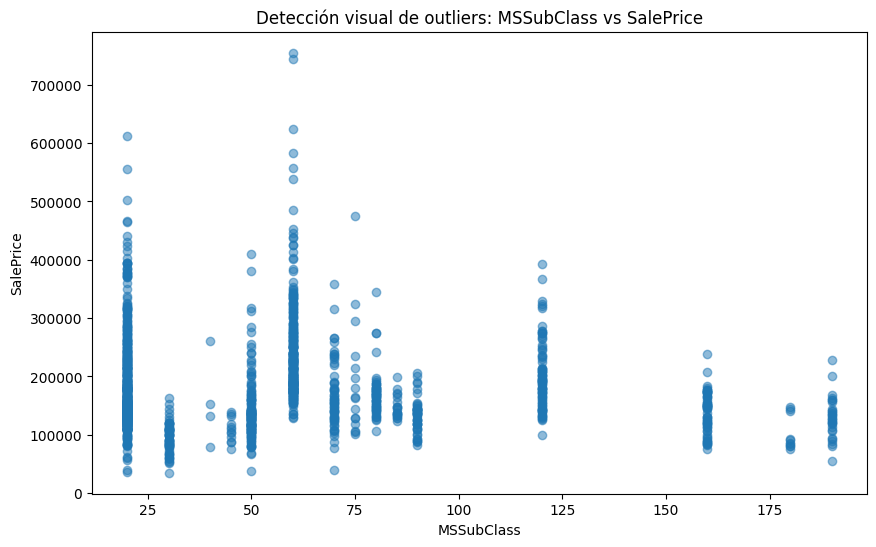

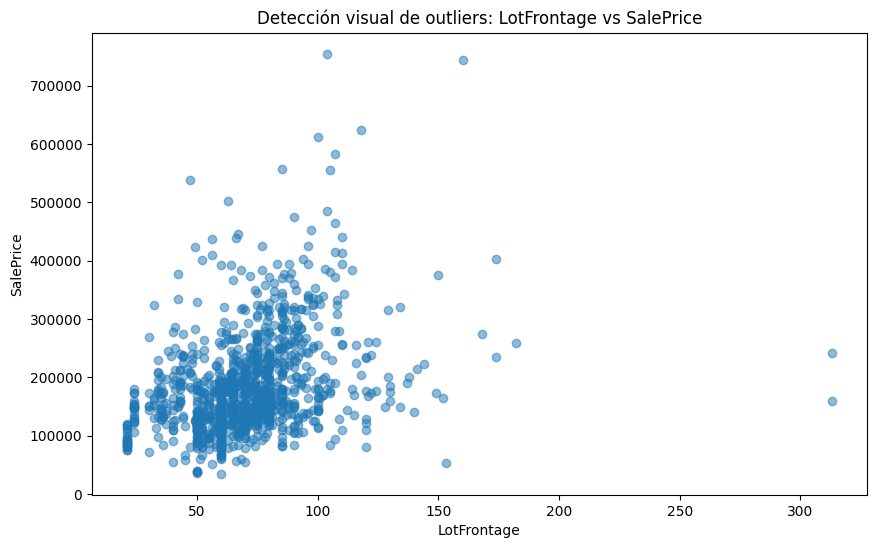

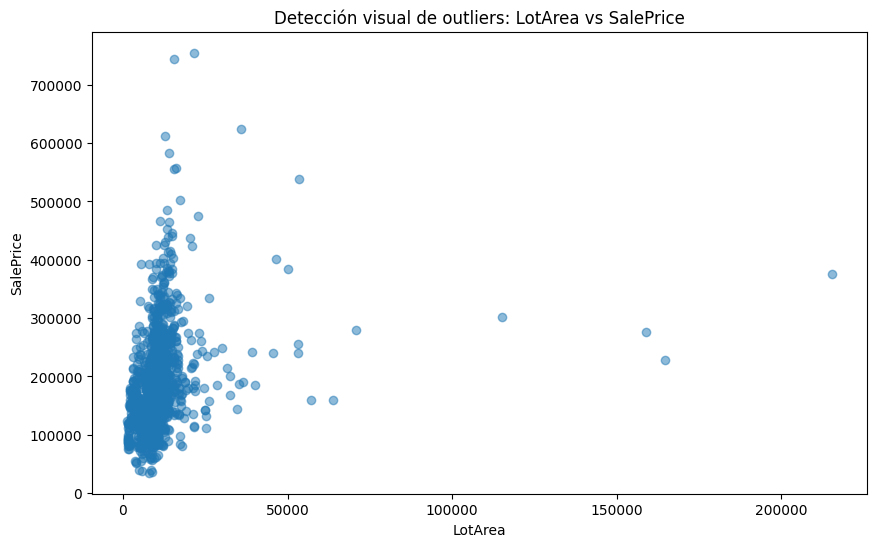

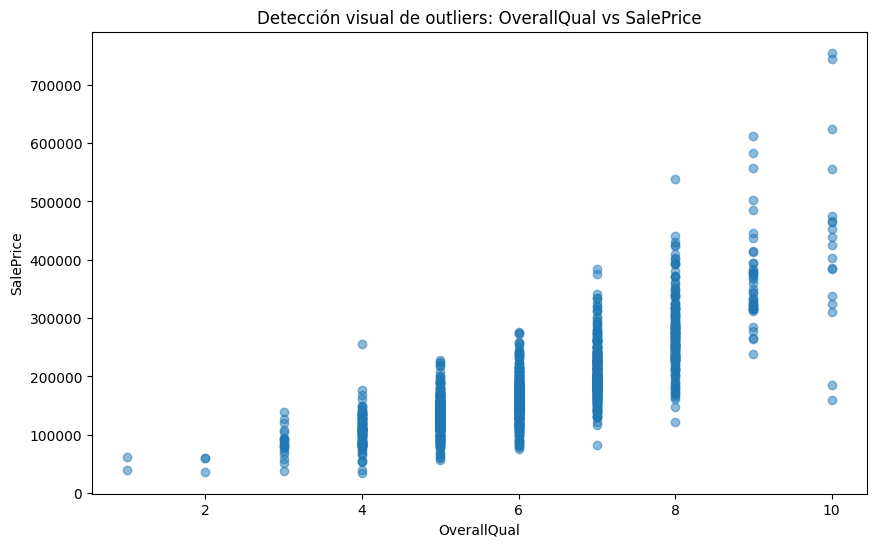

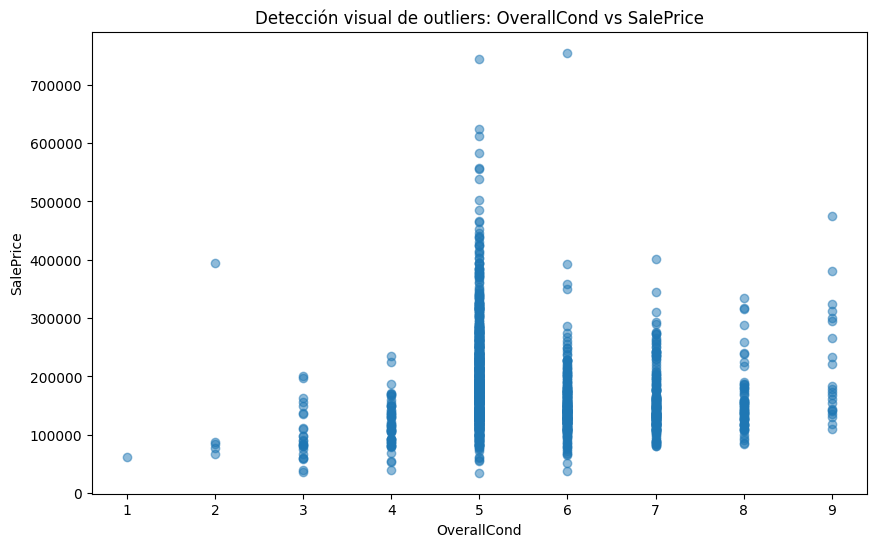

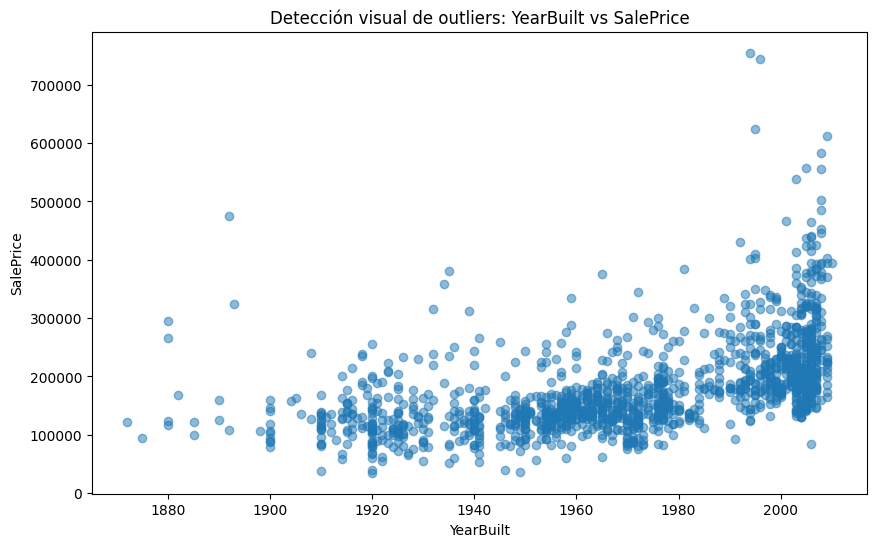

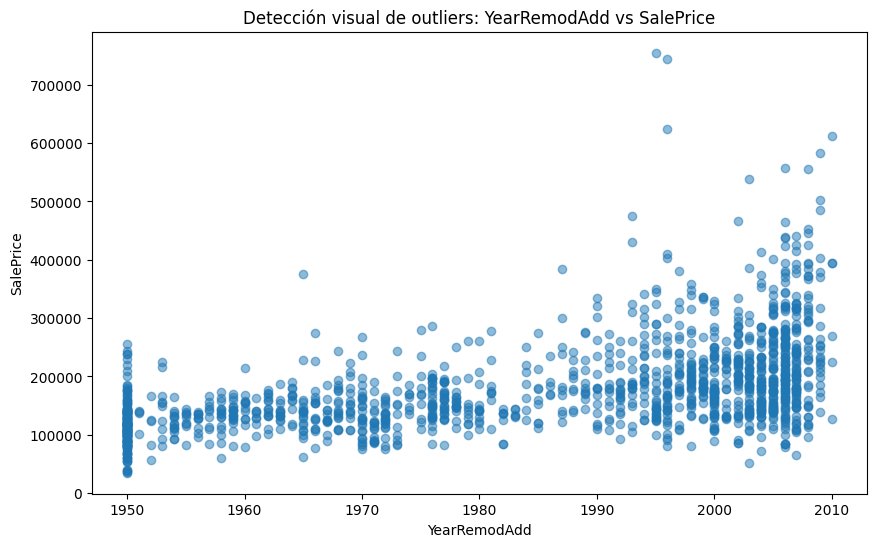

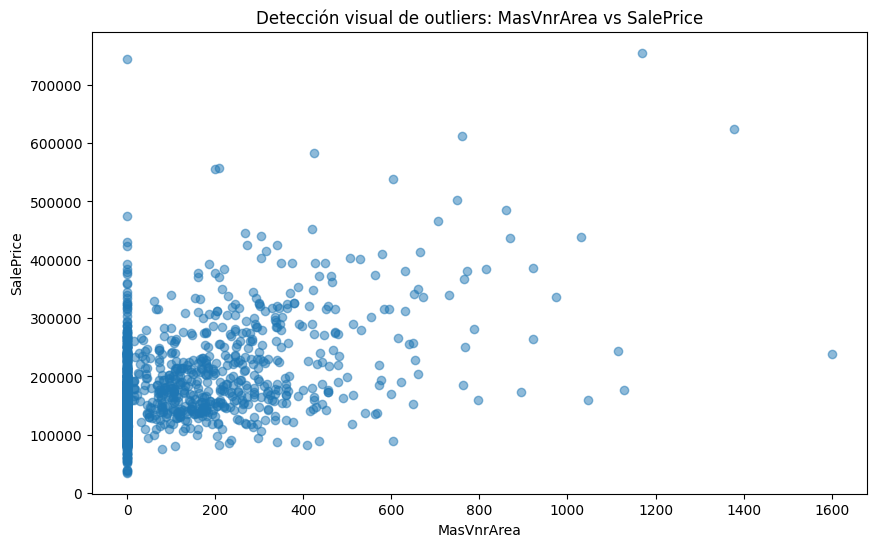

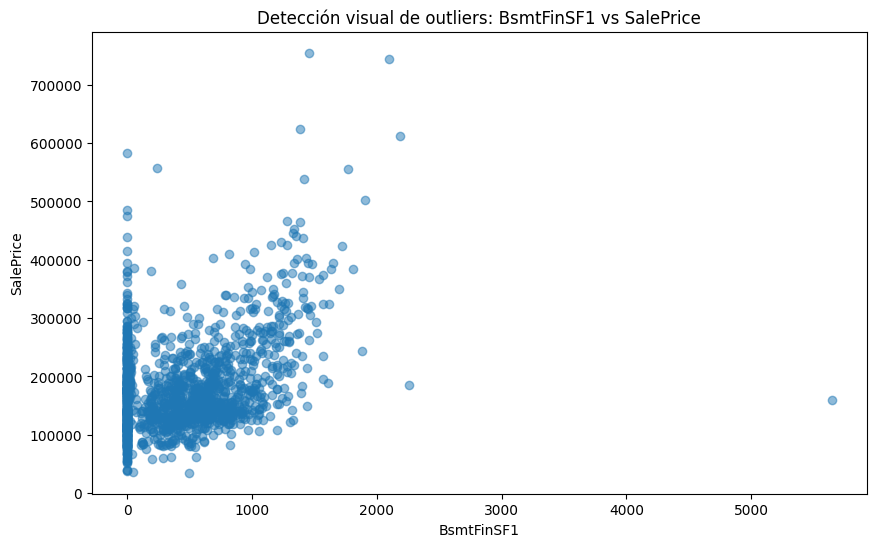

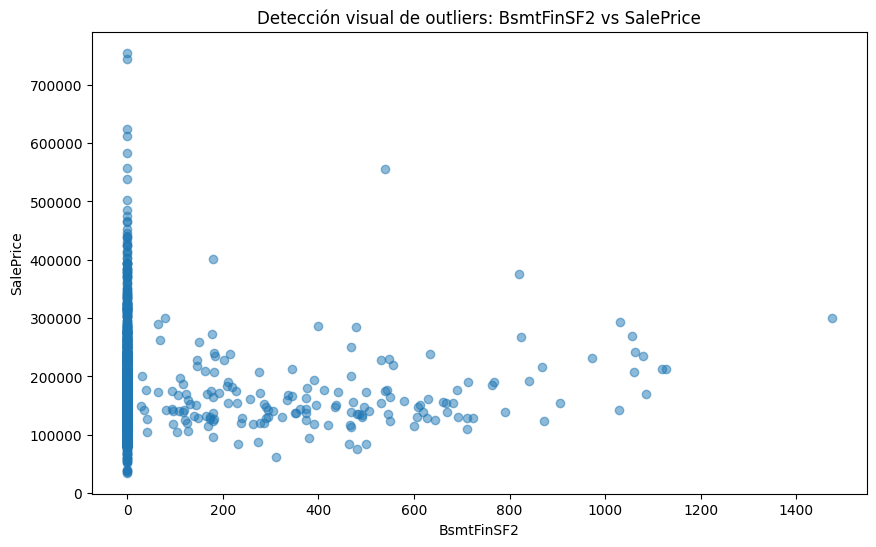

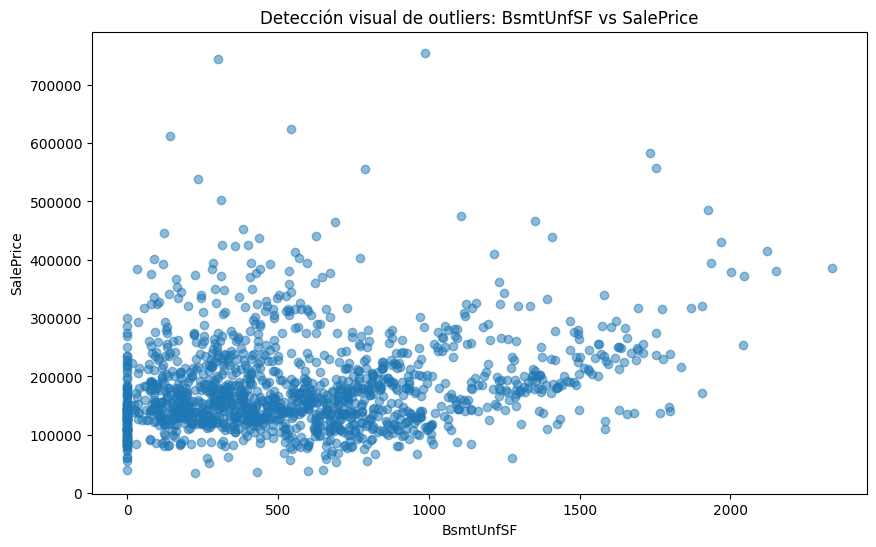

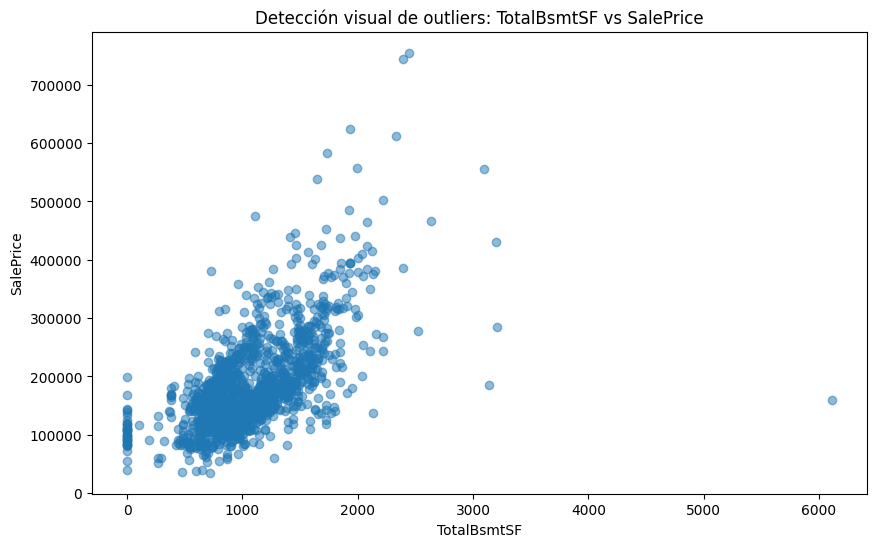

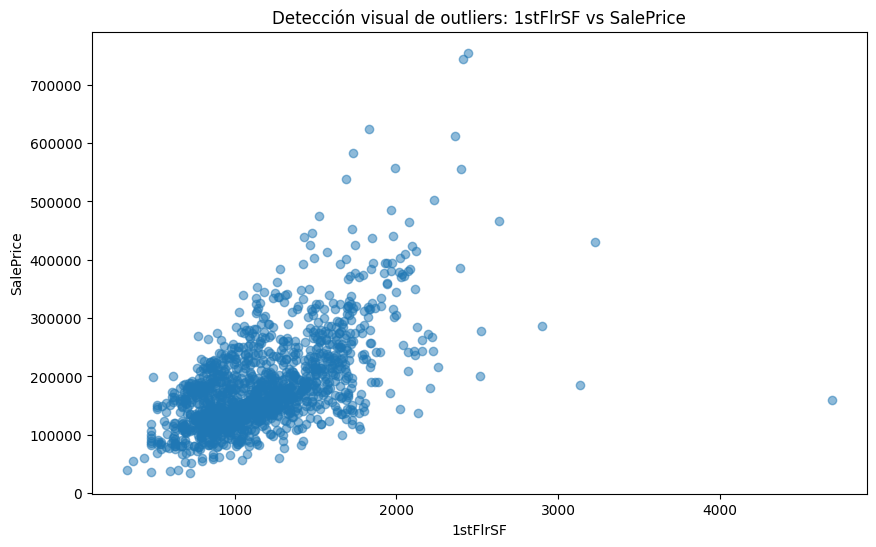

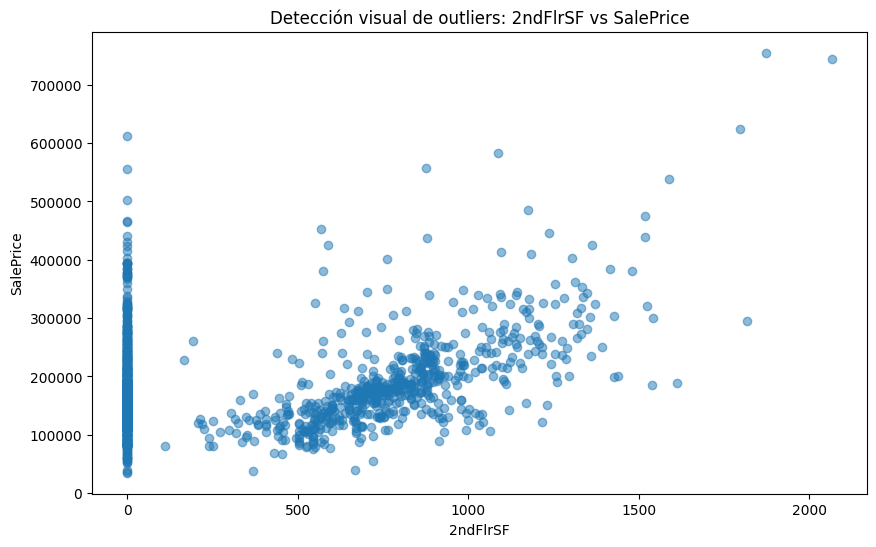

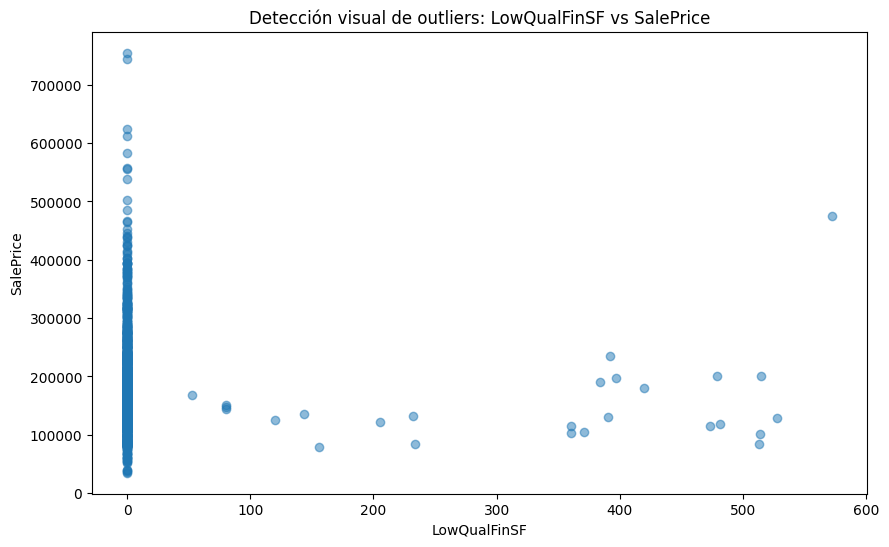

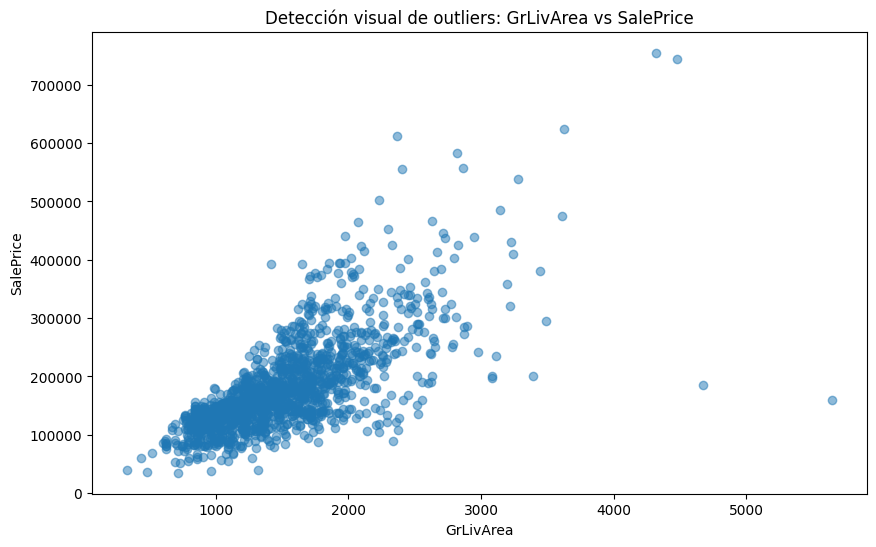

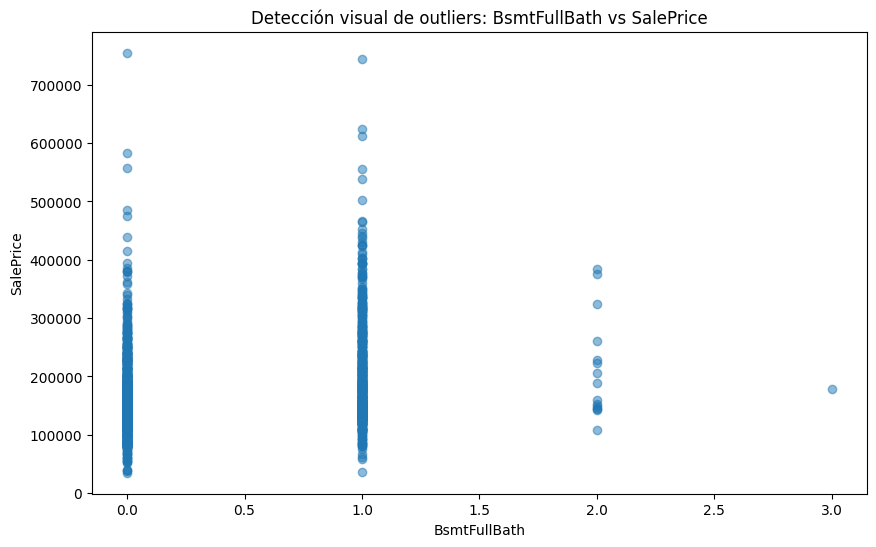

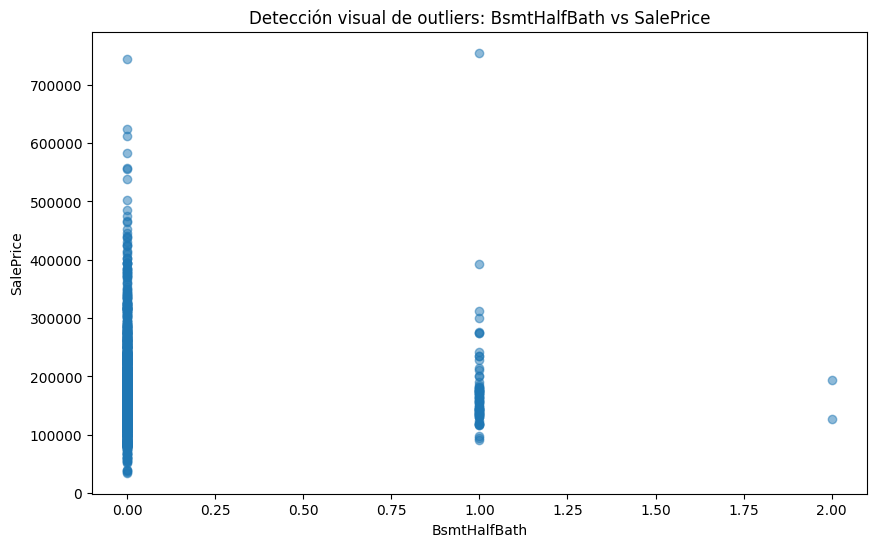

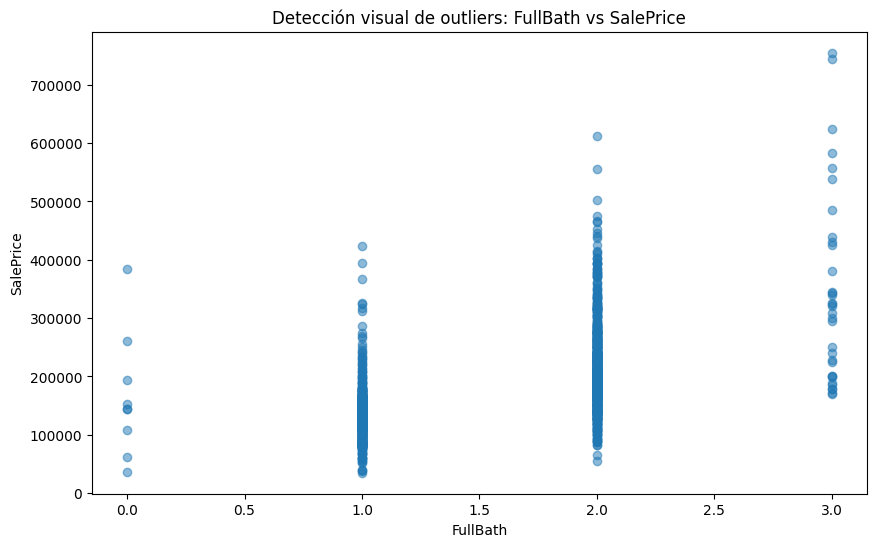

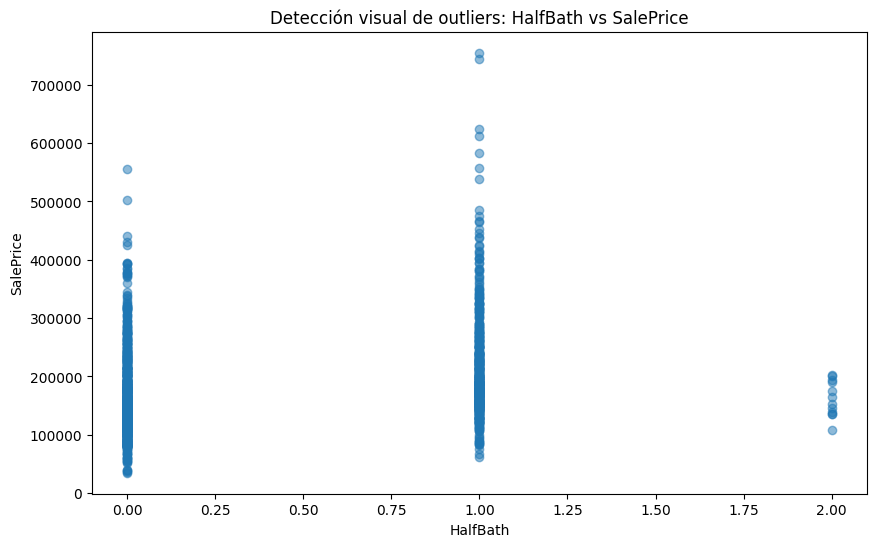

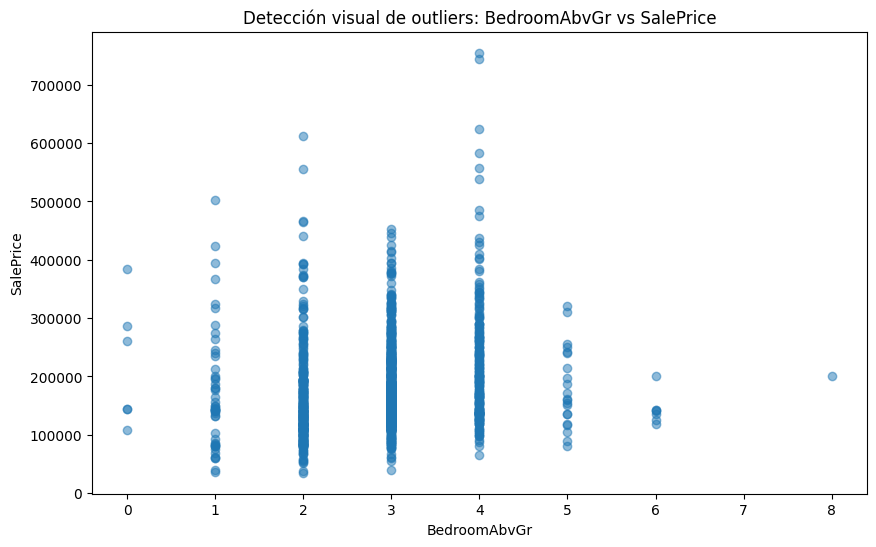

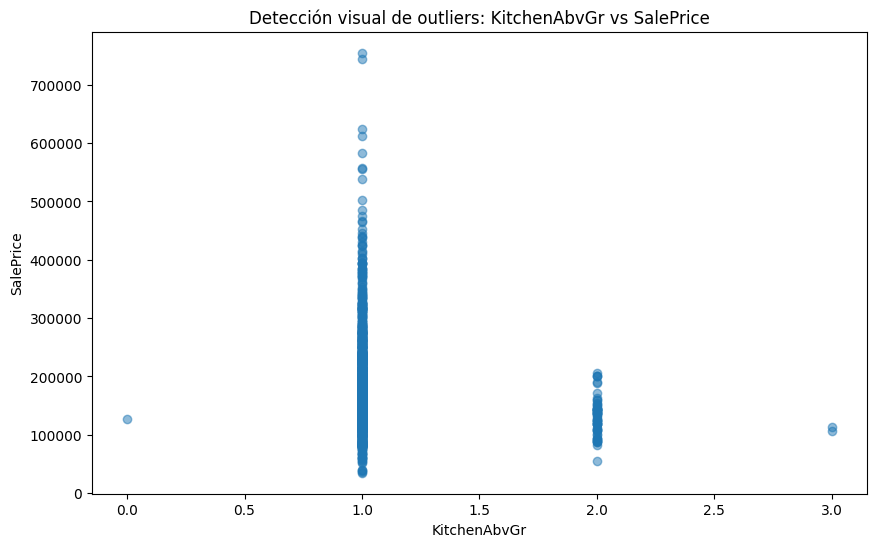

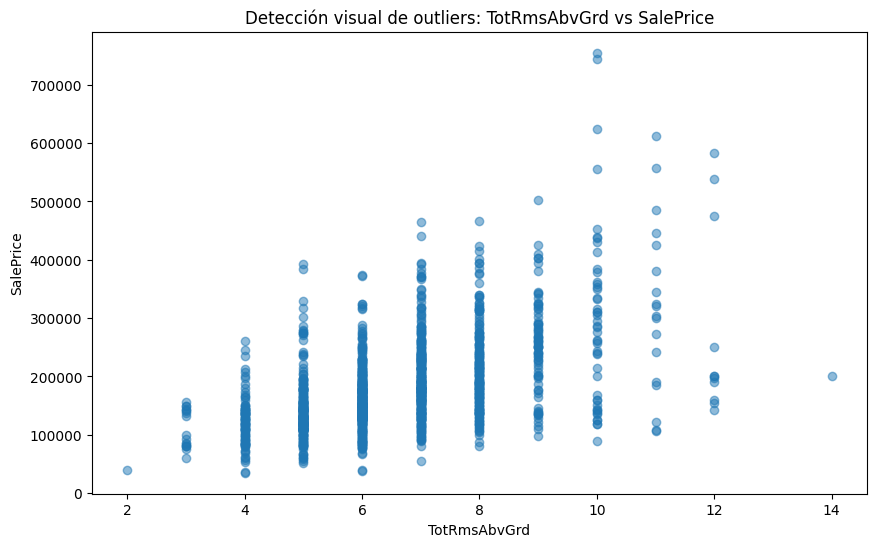

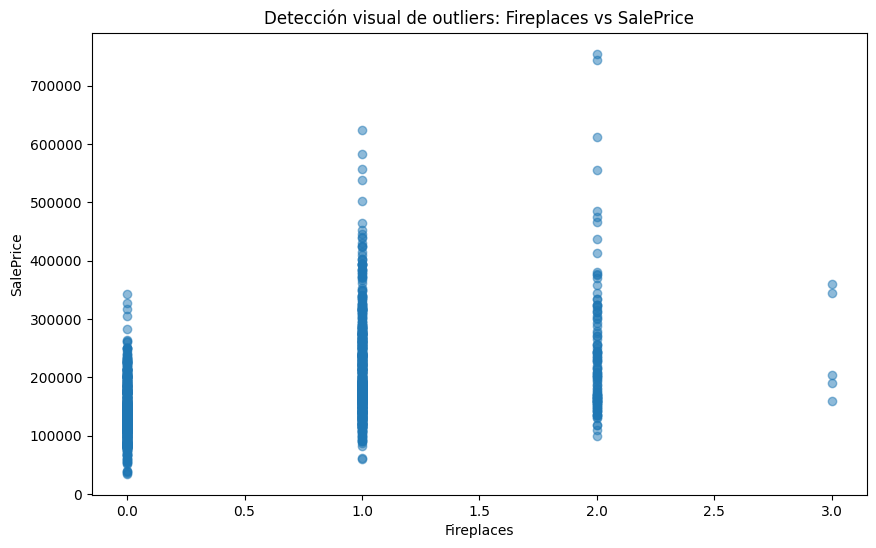

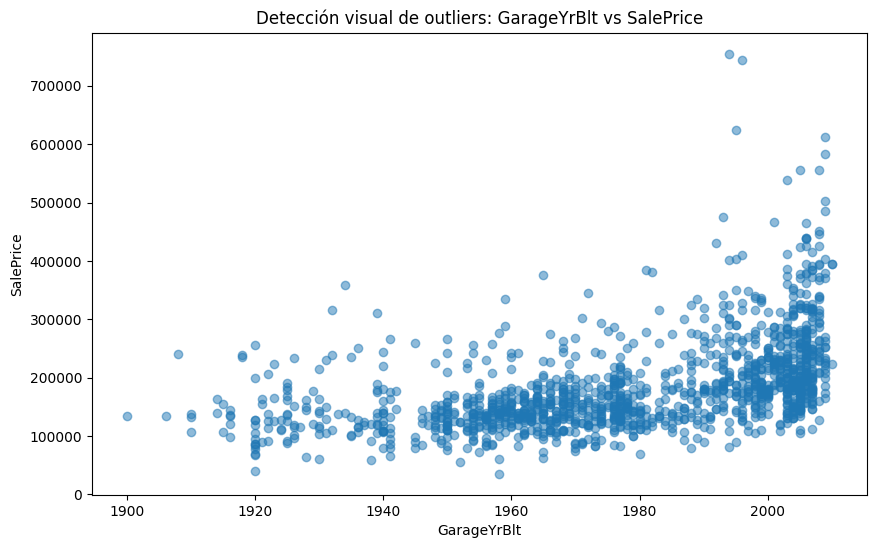

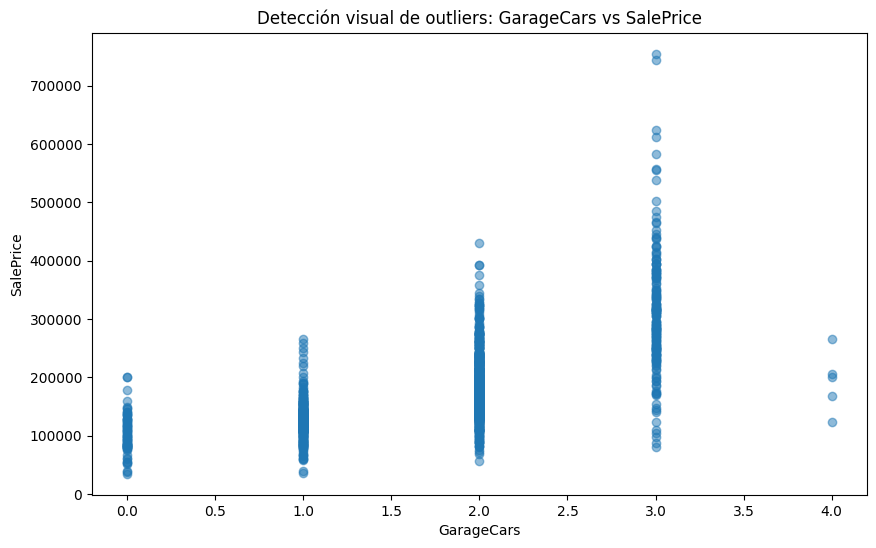

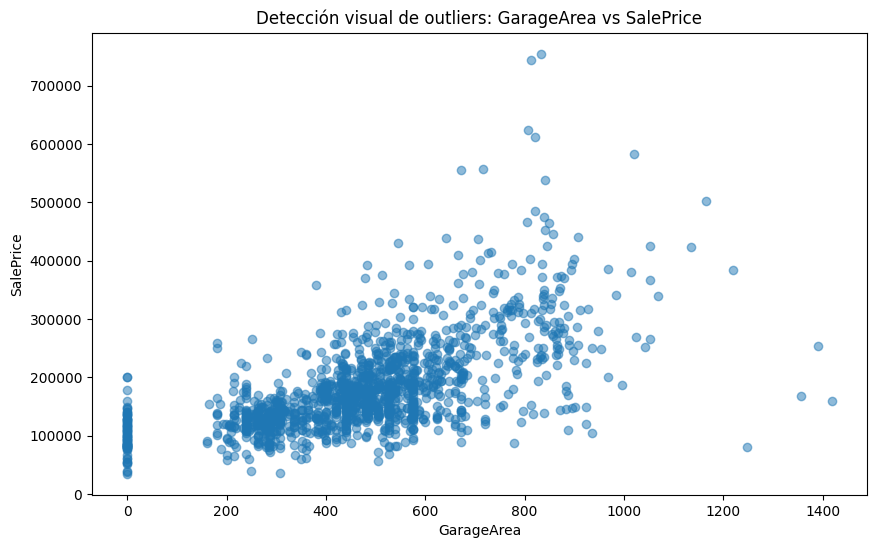

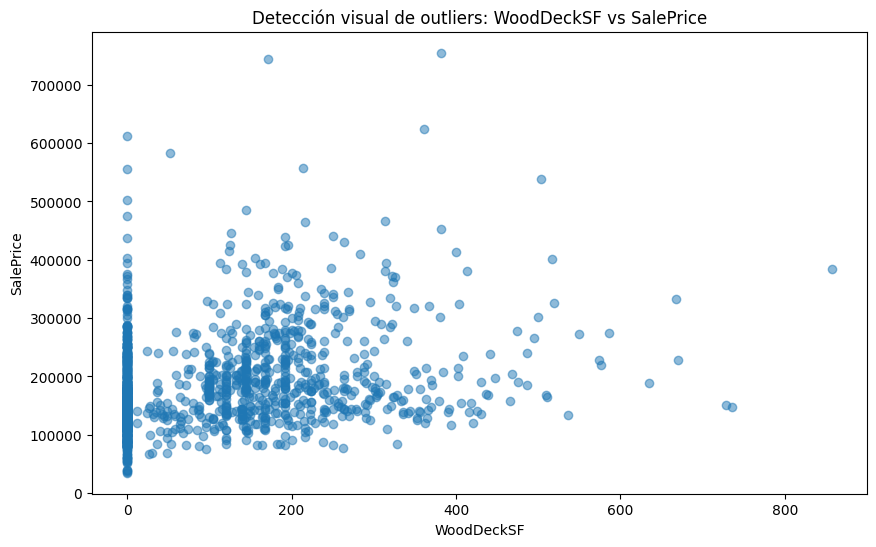

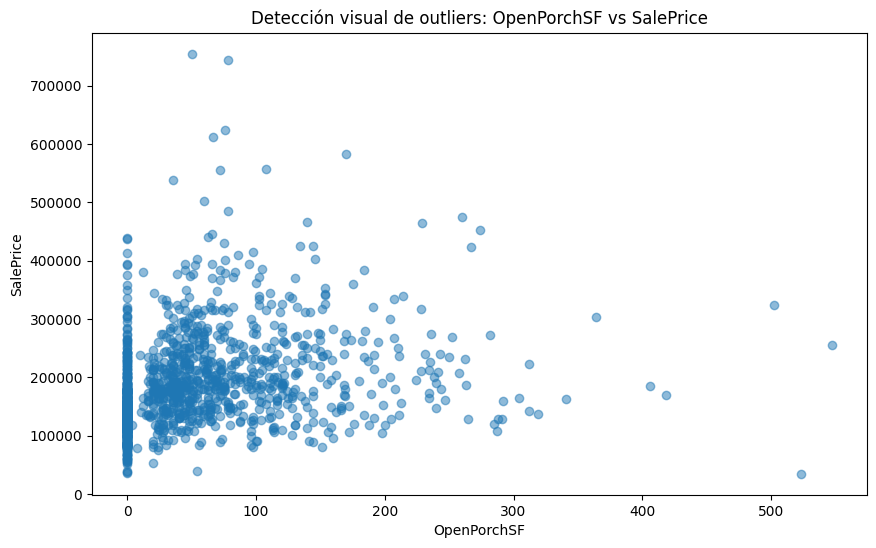

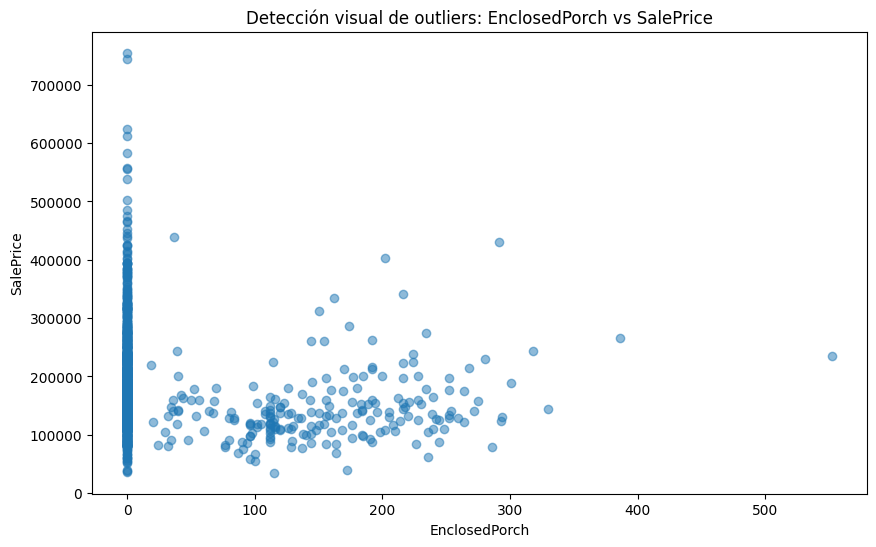

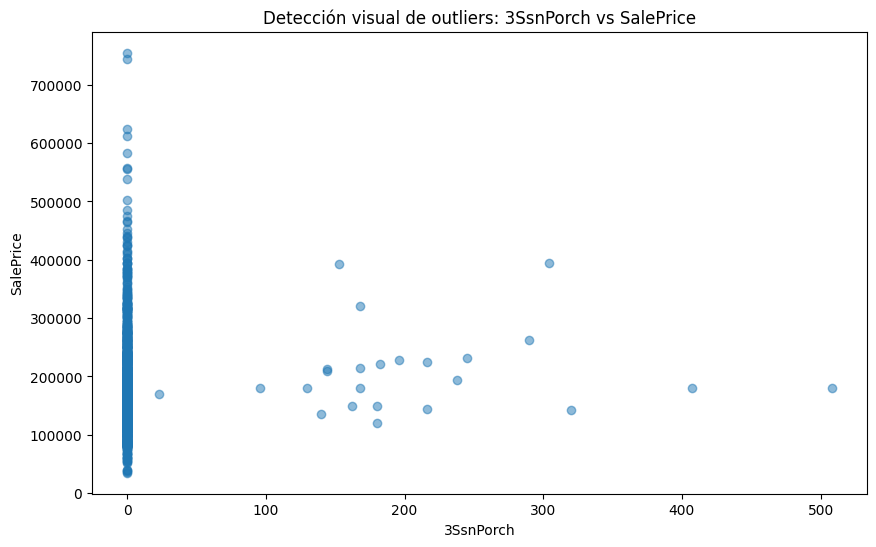

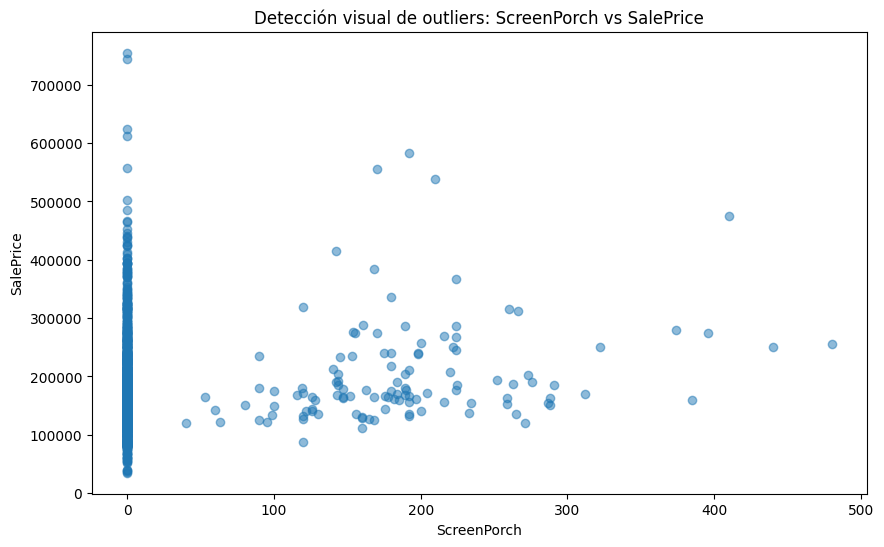

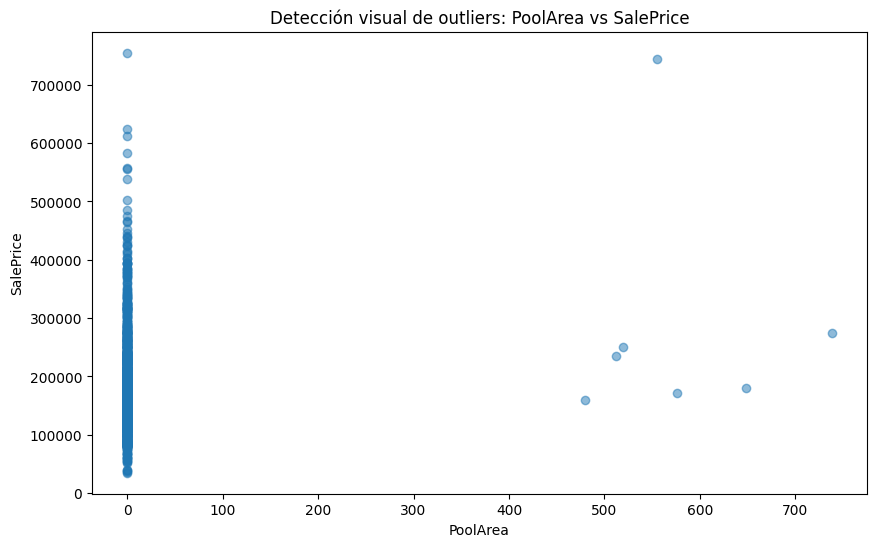

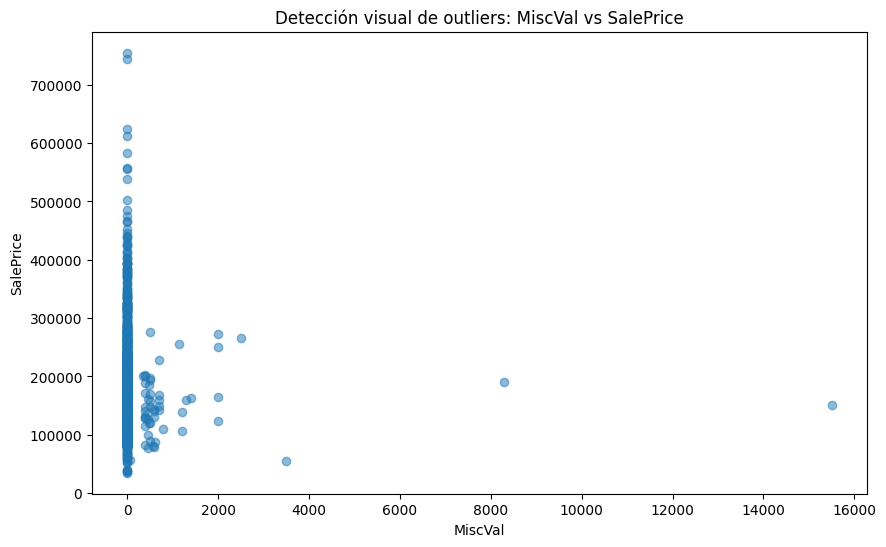

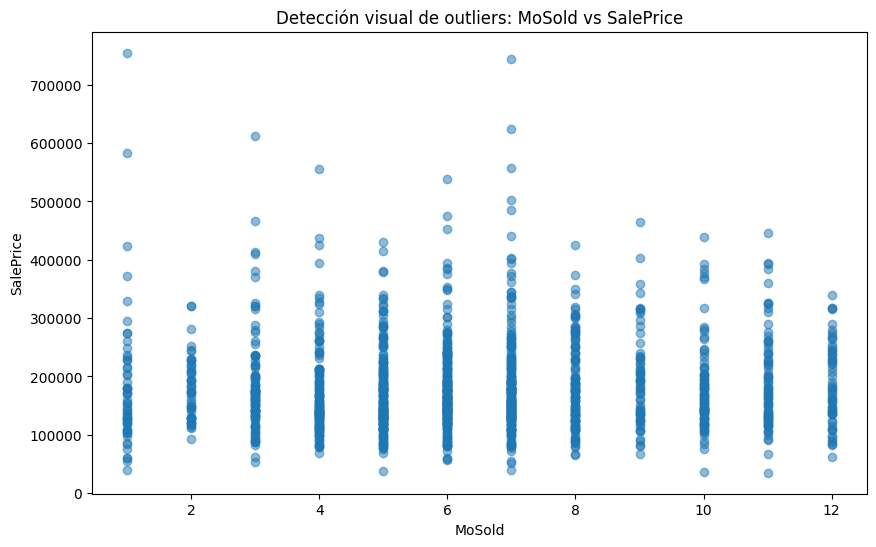

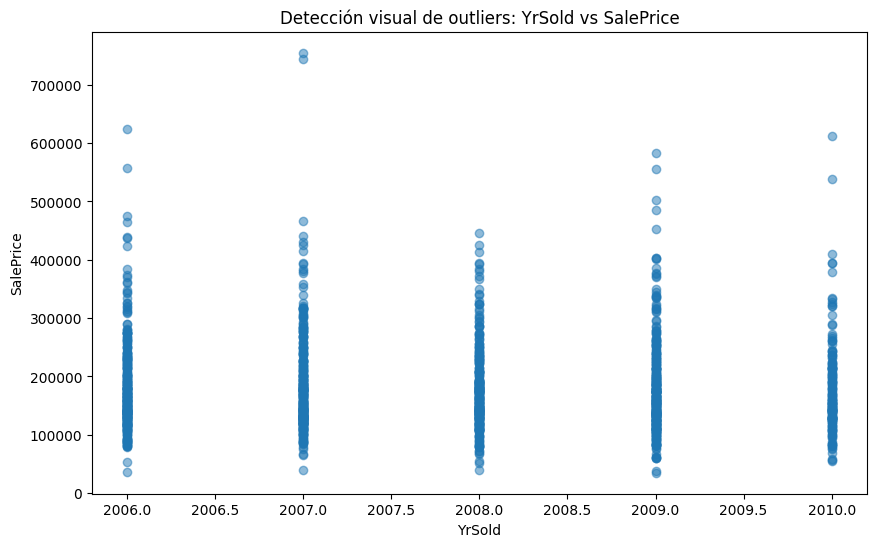

In [20]:
# Seleccionar columnas numéricas excepto SalePrice
columnas = train.select_dtypes(include=['int64', 'float64']).columns
columnas = columnas.drop("SalePrice")

# Bucle para graficar
for col in columnas:
    plt.figure(figsize=(10,6))
    plt.scatter(train[col], train["SalePrice"], alpha=0.5)
    plt.xlabel(f"{col}")
    plt.ylabel("SalePrice")
    plt.title(f"Detección visual de outliers: {col} vs SalePrice")
    plt.show()

In [21]:
# Mejores Outliers encontrados por criterio individual
train = train[train["GrLivArea"] < 4000]
train = train[train["LotFrontage"] < 250]
train = train[train["LotArea"] < 4500]
train = train[train["MasVnrArea"] < 1250]
train = train[train["BsmtFinSF1"] < 3000]
train = train[train["BsmtFinSF2"] < 1200]
train = train[train["TotalBsmtSF"] < 3000]
train = train[train["1stFlrSF"] < 2750]
train = train[train["EnclosedPorch"] < 450]
train = train[train["WoodDeckSF"] < 800]
train = train[train["OpenPorchSF"] < 390]
train = train[train["MiscVal"] < 4000]

train = train[train["SalePrice"] < 700000]

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)


In [22]:
# Separamos variables
X = train.drop(columns=["SalePrice"])
y = train["SalePrice"]

# 9.- Dividir Train/Test

In [23]:
# Dividir en Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 10.- Creacion de Modelos con Pipeline: RandomForest, XGBoost, LightGBM

In [24]:
numeric_features = X.select_dtypes(include=['int64','float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encode", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

In [25]:
# Crear modelo de RandomForest con Pipeline para evitar fuga de datos
from sklearn.ensemble import RandomForestRegressor

rf_model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", RandomForestRegressor(
        n_estimators=400,
        max_depth=30,
        random_state=42
    ))
])

rf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea',...
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('model',
                 RandomForestRegressor(max_depth=30, n_estimators=400,
                                       random_state=42))])

In [26]:
# XGBost model
from xgboost import XGBRegressor

xgb_model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", XGBRegressor(
        n_estimators=800,
        learning_rate=0.03,
        max_depth=6,
        subsample=0.9,
        colsample_bytree=0.9,
        random_state=42
    ))
])

xgb_model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea',...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.03,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=800, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

# 11.- Calcular RMSE, MAE y R²

In [27]:
def evaluar(modelo, X_test, y_test):
    pred = modelo.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    mae = mean_absolute_error(y_test, pred)
    r2 = r2_score(y_test, pred)

    print("RMSE:", rmse)
    print("MAE:", mae)
    print("R2:", r2)
    return pred

In [28]:
print("🔹 Random Forest")
rf_pred = evaluar(rf_model, X_test, y_test)

print("\n🔹 XGBoost")
xgb_pred = evaluar(xgb_model, X_test, y_test)

print("\n🔹 LightGBM")
#lgb_pred = evaluar(lgb_model, X_test, y_test)

🔹 Random Forest
RMSE: 16690.360813664603
MAE: 8727.997499999998
R2: 0.8752351299200725

🔹 XGBoost
RMSE: 9838.069324306212
MAE: 7329.5014880952385
R2: 0.9566508461309312

🔹 LightGBM


Observamos que RandomForest mejoro en sus resultados significativamente, y XGBost fue el que tuvo la mejor prediccion. 
Al final no usamos LGBMRegressor ya que obtuvimos valores bajos comparado con los otros modelos de R2 = 0.79 y  RMSE = 21368

# 12.- Graficar errores del modelo (error residual)

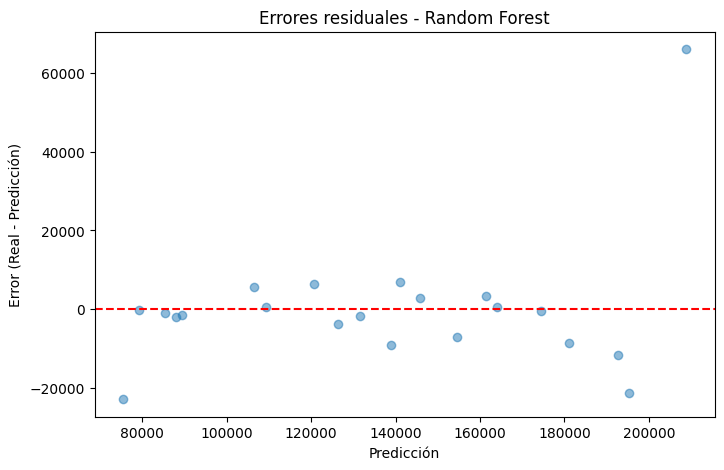

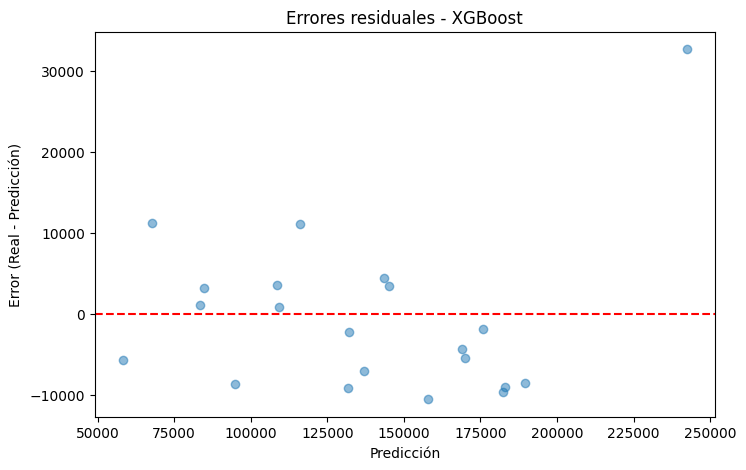

In [29]:
def plot_errores(y_test, preds, title):
    errores = y_test - preds

    plt.figure(figsize=(8,5))
    plt.scatter(preds, errores, alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title(f"Errores residuales - {title}")
    plt.xlabel("Predicción")
    plt.ylabel("Error (Real - Predicción)")
    plt.show()

plot_errores(y_test, rf_pred, "Random Forest")
plot_errores(y_test, xgb_pred, "XGBoost")
#plot_errores(y_test, lgb_pred, "LightGBM")

In [30]:
test_preds = xgb_model.predict(test)

In [31]:
# Primer intento (modificado para que no cree otro submission)
'''
output = pd.DataFrame({'Id': test.Id,
                      'SalePrice': test_preds})
output.to_csv('submission.csv', index=False)

print("Archivo 'submission.csv' generado correctamente.")
'''

'\noutput = pd.DataFrame({\'Id\': test.Id,\n                      \'SalePrice\': test_preds})\noutput.to_csv(\'submission.csv\', index=False)\n\nprint("Archivo \'submission.csv\' generado correctamente.")\n'

### Al final sacamos un 0.28 en el public score con este "test_preds", veamos si lo podemos mejorar aun mas.
Usaremos parte de la informacion obtenida, pero ahora:
- Uniremos tanto df test como train.
- Tambien me di cuenta que no habia eliminado el "Id" para el entrenamiento quiza afecto al resultado.


# 13.- Intentando mejorar mas el modelo (2do. intento) "Editado" ↓

In [32]:
# Limpieza
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

# Guardar Id del test para la submission
test_ids = test["Id"]

# Eliminar Id de ambos para mejorar la prediccion del modelo
train = train.drop(columns=["Id"])
test  = test.drop(columns=["Id"])

# Separar la variable objetivo en y
y = train["SalePrice"]
X = train.drop(columns=["SalePrice"])

# Combinar train + test para limpiar juntos
combined = pd.concat([X, test], axis=0, ignore_index=True)

In [33]:
# Corregimos valores de texto incosistentes
combined = combined.applymap(lambda z: z.strip() if isinstance(z, str) else z)


/tmp/ipykernel_13/1785905112.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  combined = combined.applymap(lambda z: z.strip() if isinstance(z, str) else z)


In [34]:
# Aplicando Outliners

# Diccionario con columna: límite
limits = {
    "GrLivArea": 4000,
    "LotFrontage": 250,
    "LotArea": 4500,
    "MasVnrArea": 1250,
    "BsmtFinSF1": 3000,
    "BsmtFinSF2": 1200,
    "TotalBsmtSF": 3000,
    "1stFlrSF": 2750,
    "EnclosedPorch": 450,
    "WoodDeckSF": 800,
    "OpenPorchSF": 390,
    "MiscVal": 4000,
    "SalePrice": 700000
}

# Aplicar filtros en un bucle
for col, max_value in limits.items():
    train_clean = train[train[col] < max_value]

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)


In [35]:
# Actualizamos:
y = train_clean["SalePrice"]
combined = pd.concat([train_clean.drop(columns=["SalePrice"]), test], axis=0).reset_index(drop=True)


In [36]:
# Definimos preprocesamiento Pipeline

numeric_cols = combined.select_dtypes(include=['int64','float64']).columns
categorical_cols = combined.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encode", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)


In [37]:
# Dividimos train y test
X_full = preprocess.fit_transform(combined)

# reconstruimos train/test usando el tamaño original
X_train = X_full[:len(train_clean)]
X_test  = X_full[len(train_clean):]


In [38]:
# Entrenamos XGBost Forest
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=1200,
    learning_rate=0.03,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb.fit(X_train, y)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.03, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [39]:
# Evaluamos RMSE R2 y MAE

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y, test_size=0.2, random_state=42)

# Training
xgb.fit(X_tr, y_tr)
pred = xgb.predict(X_val)

# Métricas:
rmse = np.sqrt(mean_squared_error(y_val, pred))
mae = mean_absolute_error(y_val, pred)
r2 = r2_score(y_val, pred)

print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)


RMSE: 21718.802839598793
MAE: 14780.985966930652
R2: 0.912990640234495


# NOTA: 
### Importante, nuestros parametros no son mejores pero veamos como se comportan en la puntuacion final de submision veamos si el score mejoro

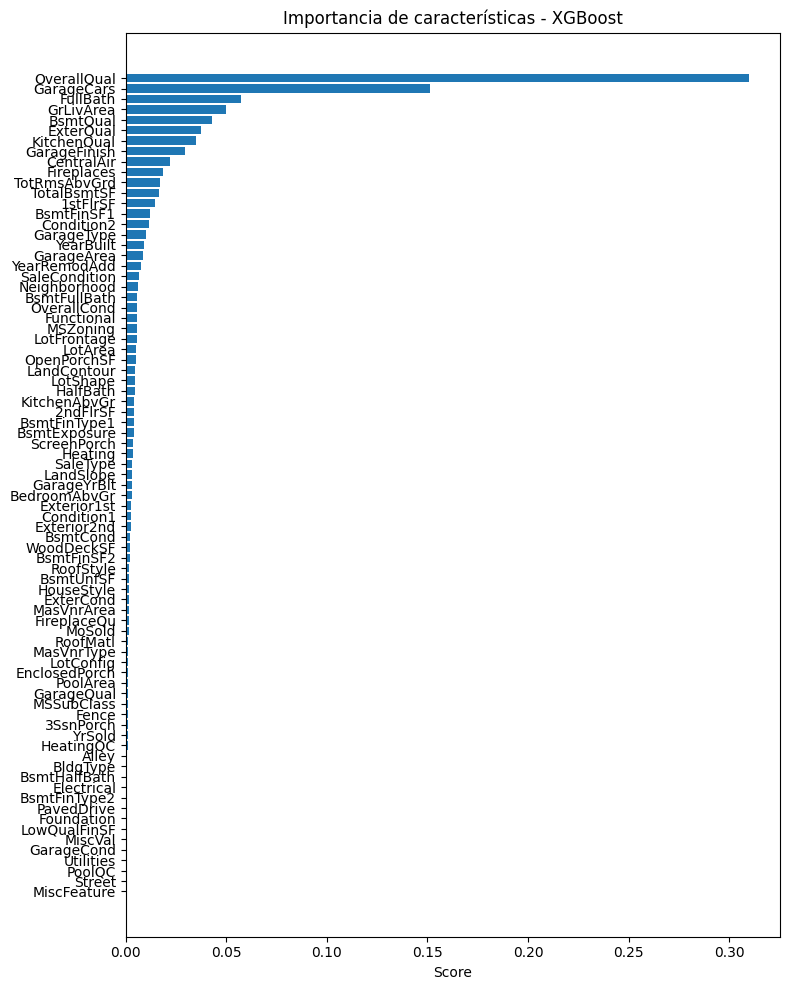

In [40]:
# Importancia de Caracteristicas

importances = xgb.feature_importances_

# Reconstruir nombres de columnas
feature_names = list(numeric_cols) + list(categorical_cols)

# Ordenar de menor a mayor
indices = np.argsort(importances)

plt.figure(figsize=(8, 10))
plt.barh(np.array(feature_names)[indices], importances[indices])
plt.title("Importancia de características - XGBoost")
plt.xlabel("Score")
plt.tight_layout()
plt.show()

# Final: Crear archivo sumbission

In [41]:
# Predccion final
final_pred = xgb.predict(X_test)

In [42]:
# 2do. Intento
submission = pd.DataFrame({"Id": test_ids,
                           "SalePrice": final_pred})

submission.to_csv('submission.csv', index=False)

print("Archivo 'submission.csv' generado correctamente.")


Archivo 'submission.csv' generado correctamente.


Mejoro el public score a 13.2, necesito ideas para mejorar mas el score. Que es un 86.8% de prediccion